In [166]:
#11/10/24 the conglomerated graph creating script
import pandas as pd
import numpy as np
import re
import os

datasets = []
modelindex = []
directory = '/Users/james/Documents/Honours/Results/conglomdata/'
namelist = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if 'csv' in filename:
        pathname = directory + file
        df = pd.read_csv(pathname)
        datalist = df['Dataset'].values
        df = df.drop(['Dataset'], axis = 1)
        datasets.append(df)
        namelist.append(filename[:-4])
        
index = ['SVM', 'RF', 'KNN', 'NN']
colors = ['#648FFF', '#FE6100', '#785EF0', '#FFB000', '#DC267F']

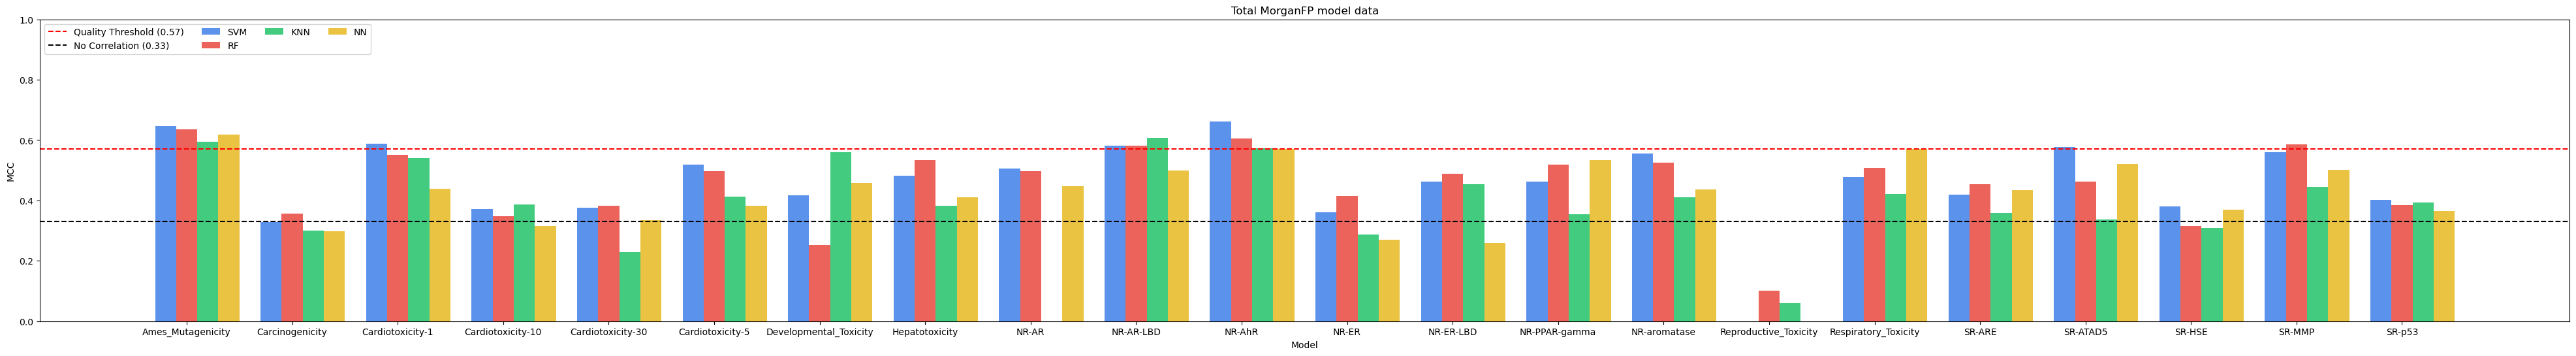

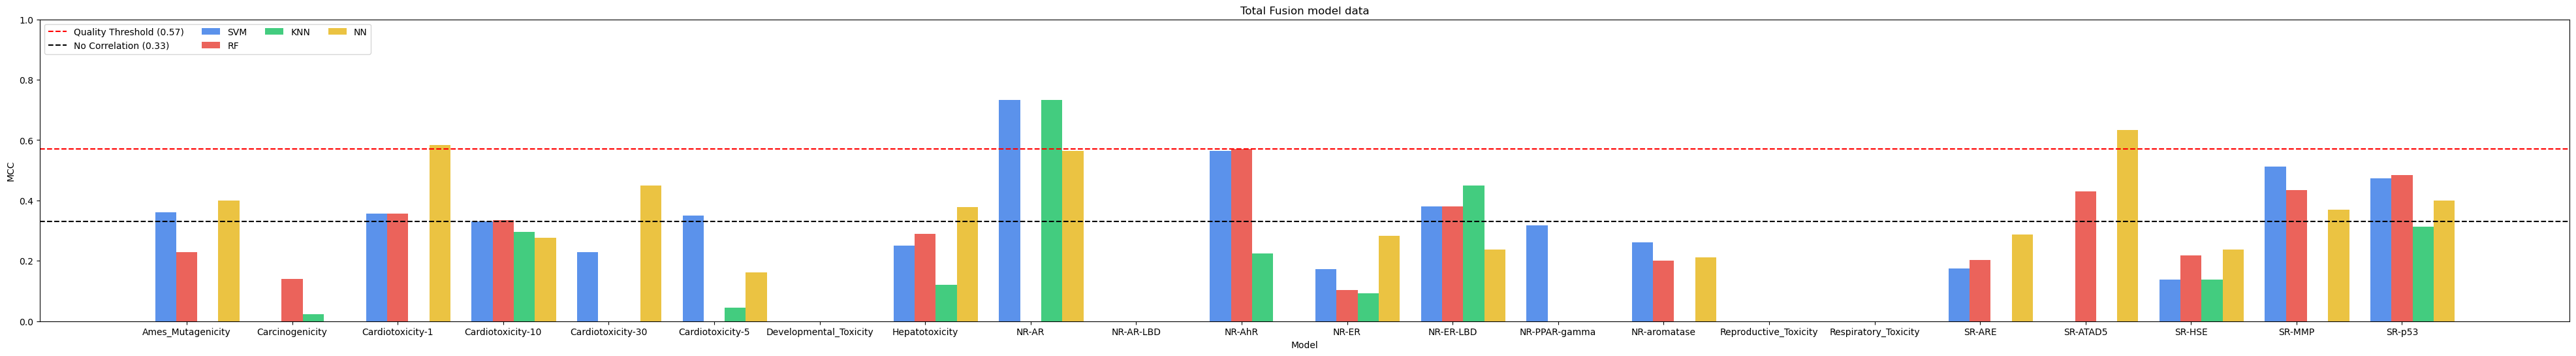

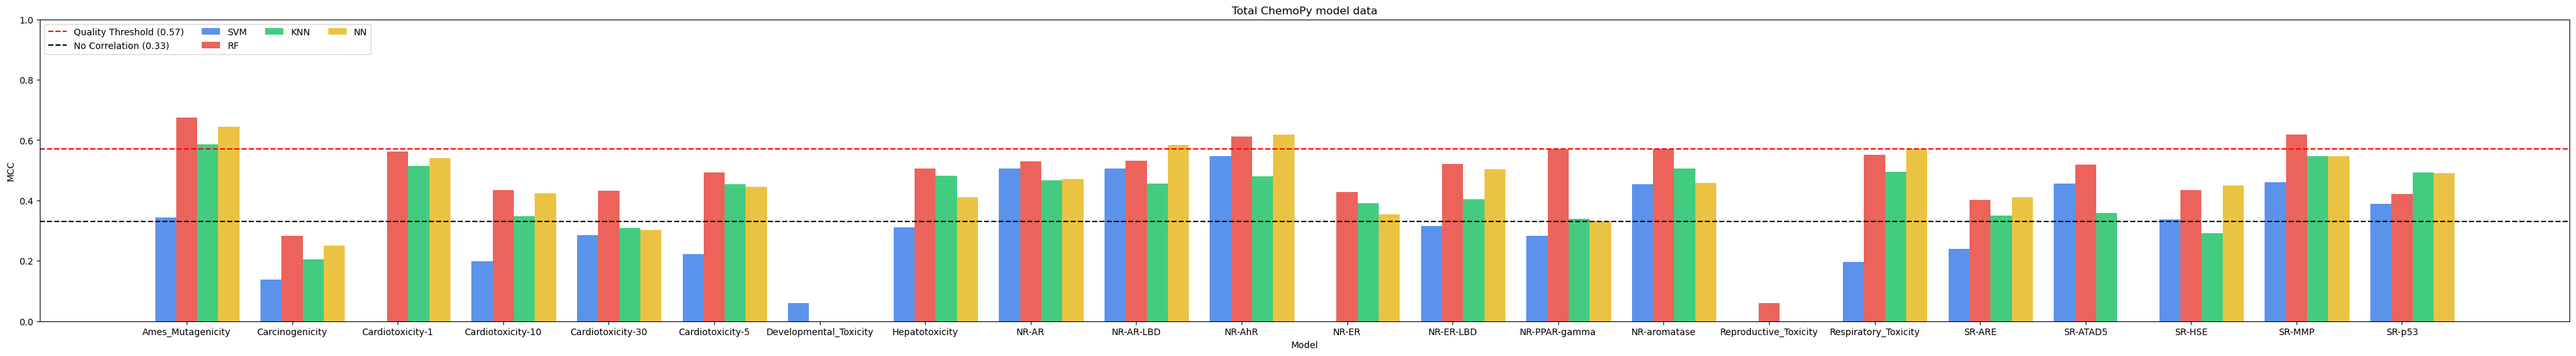

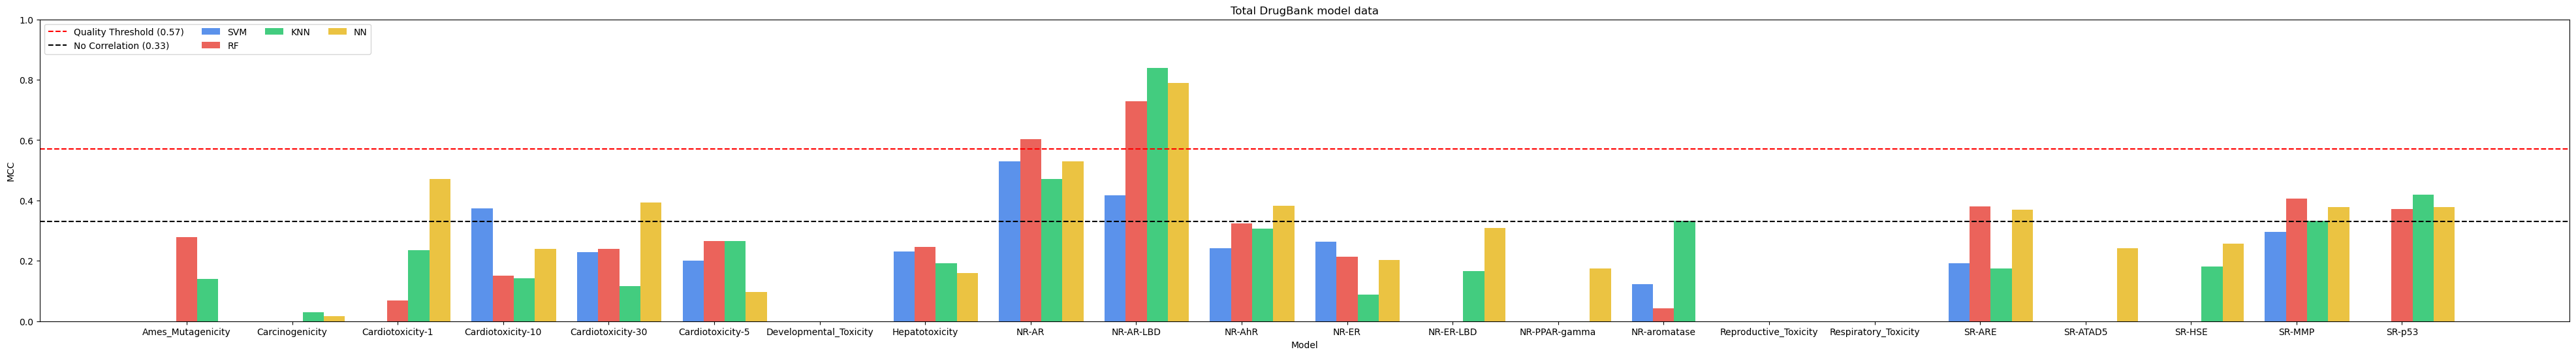

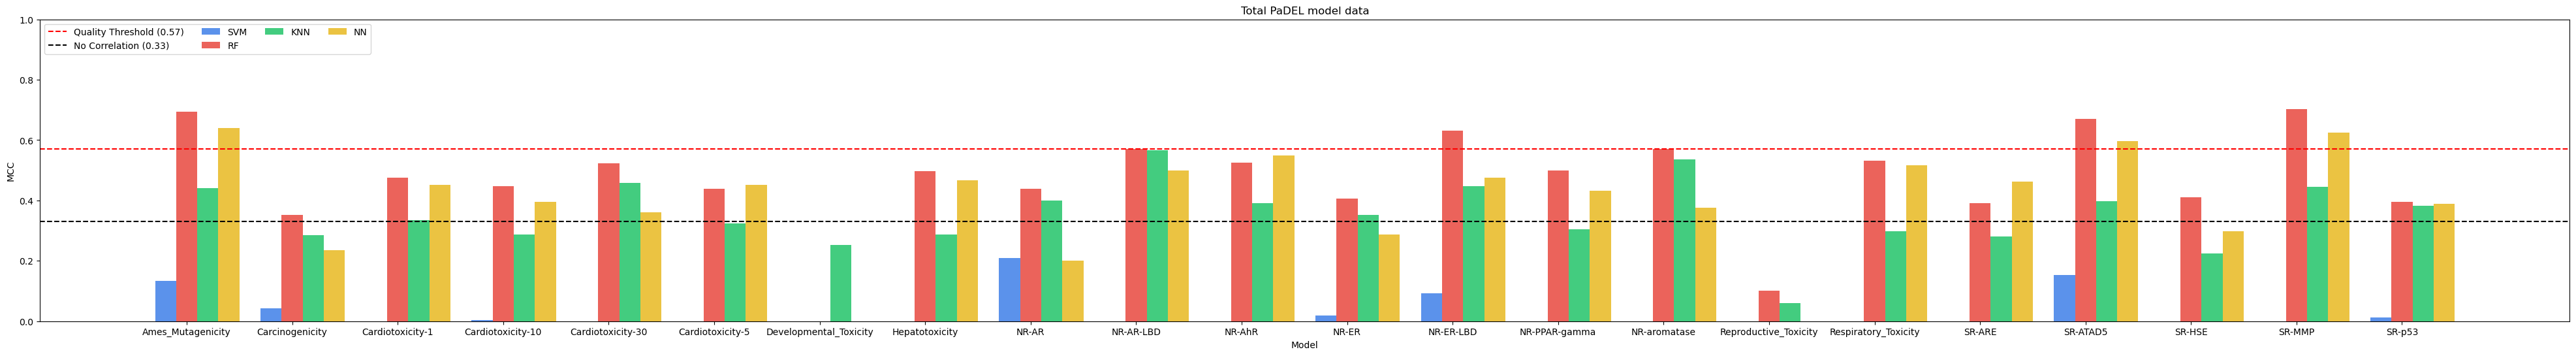

In [160]:
#Net Representation models
import matplotlib.pyplot as plt
loops = 0
for fpdf in datasets:
    df = fpdf.transpose()
    mcclist = df.values
    data = mcclist

    models = ('Sample Count', 'Positive Samples', 'Negative Samples')
    x = np.arange(len(datalist)) 
    width = 0.2  
    multiplier = 0
    colors = ['#5b92eb', '#eb635b', '#43cc7f', '#ebc342']

    fig, ax = plt.subplots(figsize=(50, 6))
    iter = 0
    for measurement in data:
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=index[multiplier], color = colors[iter])
        multiplier += 1
        iter += 1

    ax.set_ylabel('MCC')
    ax.set_xlabel('Model')
    name = 'Total ' + namelist[loops] + ' model data'
    ax.set_title(name)
    ax.set_xticks(x + width, datalist)
    
    ax.set_ylim(0, 1)
    plt.axhline(y=0.57, color='r', linestyle='--', label='Quality Threshold (0.57)')
    plt.axhline(y=0.33, color='black', linestyle='--', label='No Correlation (0.33)')
    ax.legend(loc='upper left', ncols=4)

    plt.show()
    loops += 1

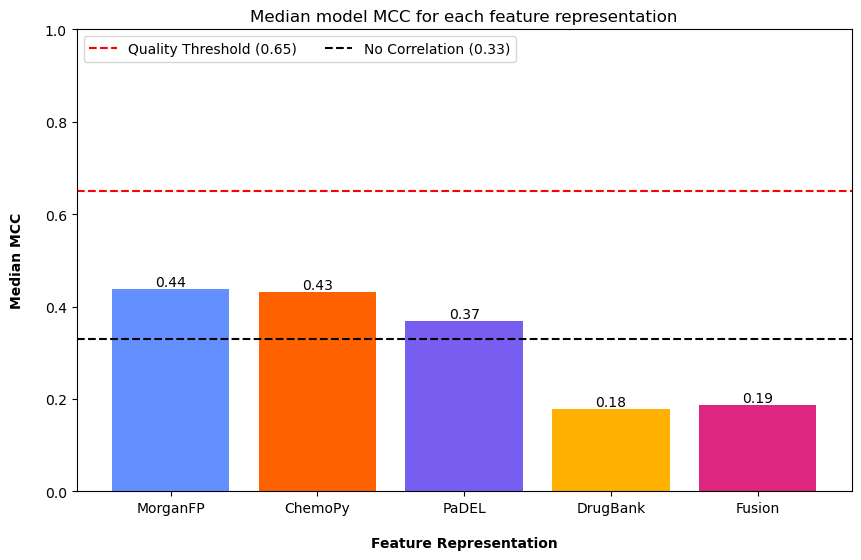

In [175]:
#averaging rep scores
import statistics
modelvals = [[], [], [], [], []]
count = 0
loops = 0
for representation in datasets:
    for modeltype in representation.values:
        for value in modeltype:
            modelvals[loops].append(value)
            count += 1
    loops += 1
            
modelaverages = []
modelsums = [0, 0, 0, 0, 0]
modelmeds = []
modelmax = []
loops = 0
for model in modelvals:
    modelmeds.append(statistics.median(model))
    modelmax.append(max(model))
    for vals in model:
        modelsums[loops] += vals
        
    loops += 1

for item in modelsums:
    modelaverages.append(item / (count/5))

#modelmeds = modelaverages
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar([namelist[0], namelist[2], namelist[4], namelist[3], namelist[1]], 
        [modelmeds[0], modelmeds[2], modelmeds[4], modelmeds[3], modelmeds[1]], color=colors)

ax.set_title('Median model MCC for each feature representation')
ax.set_xlabel('Feature Representation', fontweight = 'bold', labelpad=15)
ax.set_ylabel('Median MCC', fontweight = 'bold', labelpad=15)
ax.set_ylim(0, 1)
plt.axhline(y=0.65, color='r', linestyle='--', label='Quality Threshold (0.65)')
plt.axhline(y=0.33, color='black', linestyle='--', label='No Correlation (0.33)')
ax.legend(loc='upper left', ncols=4)
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, 
             f'{round(yval, 2):.2f}', ha='center', va='bottom', fontsize=10)


# Show the plot
plt.show()

In [163]:
modelmax

[0.7324231214502538,
 0.7278233925591444,
 0.8387132838343627,
 0.7888596970330195]

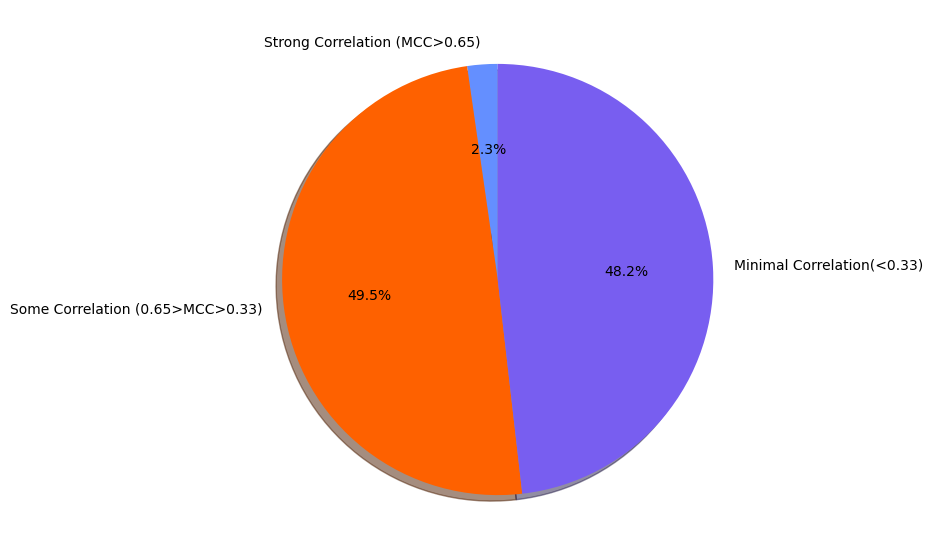

In [145]:
#plotting total vals
totalvals = []
for model in modelvals:
    for valie in model:
        totalvals.append(valie)
great = 0
okay = 0
bad = 0
for item in totalvals:
    if item > 0.65:
        great += 1
    elif item > 0.33:
        okay += 1
    else:
        bad += 1

fig, ax = plt.subplots(figsize=(10, 7))
ax.pie([great, okay, bad], 
       labels=['Strong Correlation (MCC>0.65)', 
               'Some Correlation (0.65>MCC>0.33)', 
               'Minimal Correlation(<0.33)'],
       shadow=True,
       colors=colors,
       startangle=90,
       autopct='%1.1f%%' 
      )

plt.show()

In [126]:
okay

218

In [90]:
modelaverages

[0.42680456862300675,
 0.2027046241747016,
 0.3806710303357414,
 0.19575134853449913,
 0.3064055332159148]

In [91]:
modelmeds

[0.4378109814628249,
 0.1872696358593193,
 0.43244119753061117,
 0.17797987006388322,
 0.3679180381244388]

In [161]:
#averaging model scores
import statistics
modelvals = [[], [], [], []]
count = 0
for representation in datasets:
    for modeltype in representation.values:
        loops = 0
        for value in modeltype:
            modelvals[loops].append(value)
            loops += 1
            count += 1
            
modelaverages = []
modelsums = [0, 0, 0, 0]
modelmeds = []
modelmax = []
loops = 0
for model in modelvals:
    modelmeds.append(statistics.median(model))
    modelmax.append(max(model))
    for vals in model:
        modelsums[loops] += vals
        
    loops += 1

for item in modelsums:
    modelaverages.append(item / (count/4))

In [81]:
modelmeds

[0.2277100170213244,
 0.4084053475677145,
 0.30923980332404166,
 0.3782499145577388]

In [79]:
modelaverages

[0.23310892475486084,
 0.3522363815929284,
 0.28457855444315844,
 0.33994582311614324]

In [58]:
datasets[0].values[0]

array([0.64541789, 0.63443306, 0.59397232, 0.61835207])

In [39]:
namelist

['MorganFP', 'Fusion', 'ChemoPy', 'DrugBank', 'PaDEL']